# Creating and accessing SQLite database using python

## Task 1: Creating database first.

In [1]:
#Install & load sqlite3
#!pip install sqlite3  ##Uncomment the code to install sqlite3
import sqlite3

In [2]:
# Connecting to sqlite
# connection object
conn = sqlite3.connect('INSTRUCTOR.db')

Cursor class is an instance using which you can invoke methods that execute SQLite statements, fetch data from the result sets of the queries. You can create Cursor object using the cursor() method of the Connection object/class.


In [3]:
# cursor object
cursor_obj = conn.cursor()

## Task 2: Create a table in the database

In [4]:
# Drop the table if already exists.
cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

In [5]:
# Creating table
table = """ create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""
 
cursor_obj.execute(table)
 
print("Table is Ready")

Table is Ready


## Task 3: Insert data into the table

In [6]:
cursor_obj.execute('''insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')

In [7]:
# now insert last two rows
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

## Task 4: Query data in table

In [8]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement) # is the output of the select function stored in cursor_obj?

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')


In [9]:
## Fetch few rows from the table
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
# If you want to fetch few rows from the table we use fetchmany(numberofrows) and mention the number how many rows you want to fetch
output_many = cursor_obj.fetchmany(2) 
for row_many in output_many:
  print(row_many)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


In [10]:
# Fetch only FNAME from the table
statement = '''SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
output_column = cursor_obj.fetchall()
for fetch in output_column:
  print(fetch)

All the data
('Rav',)
('Raul',)
('Hima',)


In [11]:
# Bonus: change data
query_update='''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME="Rav"'''
cursor_obj.execute(query_update)

In [12]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
output1 = cursor_obj.fetchmany(2)
for row in output1:
  print(row)

All the data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


## Task 5: Retrieve data into pandas

In [13]:
import pandas as pd
#retrieve the query results into a pandas dataframe
df = pd.read_sql_query("select * from instructor;", conn) # conn is the connector object

#print the dataframe
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [14]:
#print just the LNAME for first row in the pandas data frame
df.LNAME[0]

'Ahuja'

In [15]:
df.shape

(3, 5)

## Task 6: Close the connection

In [16]:
# Close the connection
conn.close()

# Accessing databases with SQL magic

In [21]:
!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39


In [22]:
%load_ext sql

In [23]:
import csv, sqlite3

con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [24]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [27]:
%sql sqlite:///SQLiteMagic.db

Doing the %% below to tell jupyter the whole cell is sql code

In [29]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

 * sqlite:///SQLiteMagic.db
Done.
99 rows affected.


[]

## Using python variables in SQL statements

##### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.

##### For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.


In [30]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


#### Assigning the Results of Queries to Python Variables


##### You can use the normal python assignment syntax to assign the results of your queries to python variables.

##### For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable `test_score_distribution` using the `=` operator.


In [31]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
Done.


Test_Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


#### Converting Query Results to DataFrames


##### You can easily convert a SQL query result to a pandas dataframe using the `DataFrame()` method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.


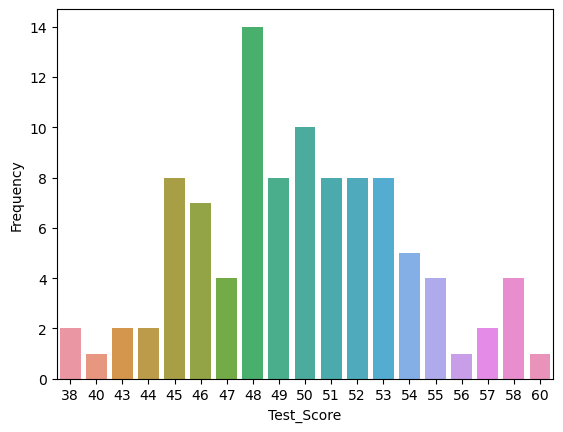

In [32]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
import seaborn

plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)

# Analyzing a real world dataset

In [33]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [34]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.4 requires lxml>=4.9.1, but you have lxml 4.6.4 which is incompatible.
yfinance 0.2.4 requires pandas>=1.3.0, but you have pandas 1.1.5 which is incompatible.
xarray 2022.11.0 requires pandas>=1.3, but you have pandas 1.1.5 which is incompatible.


In [35]:
%sql sqlite:///socioeconomic.db

## Store dataset in table

In [36]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [37]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

In [38]:
# how many rows are in the dataset?

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [39]:
# how many have hardship index greater than 50?

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE HARDSHIP_INDEX>50;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [40]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [41]:
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.
   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
(sqlite3.OperationalError) near "FETCH": syntax error
[SQL: SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [42]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


   sqlite:///SQLiteMagic.db
 * sqlite:///socioeconomic.db
Done.


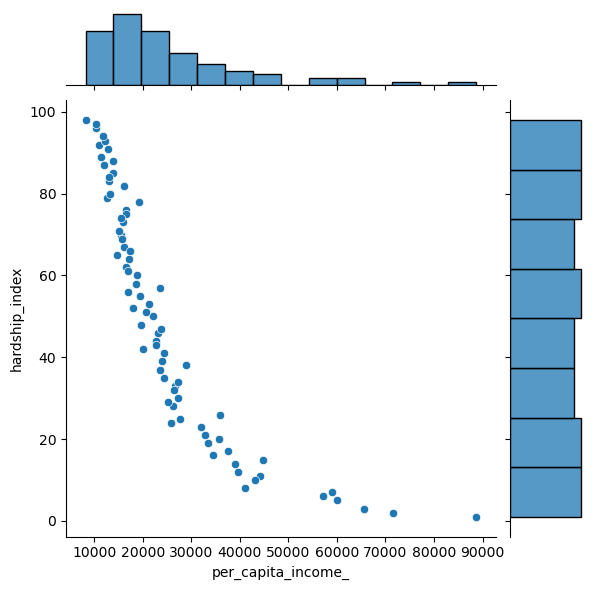

In [43]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())